# 5. Set Pieces
## Analysis of Set-Pieces for Slowenia-Denmark 17.11.2023:

Wyscout Data was used for this analysis.

In [1]:
# standard imports
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import seaborn as sns
import numpy as np

from IPython.display import display
from datetime import datetime, timedelta

# specfic soccer analysis packages
from mplsoccer import Pitch

# load custom functions
from src.visualization import *
from src.dataloader import dataloader

In [2]:
# Filter all slowenia games
# Read the CSV file with matchids into a pandas df
df_matchids = pd.read_csv('../matchids.csv')
print(df_matchids.head(1))

matchids_wys = df_matchids[(df_matchids['home'] == 'Slovenia') | (df_matchids['away'] == 'Slovenia')]['wyscout']


   wyscout  skillcorner        date        home result      away
0  5414103          NaN  2023-03-23  Kazakhstan    1-2  Slovenia


In [3]:
# Wyscout match id for Slowenia vs. Denmark 17.11.2023
match_id = "5414302"
df_events = dataloader(match_id)

# global variable for wyscout in yards?
pitch_length = 120
pitch_width = 80

### 5.1 Corners

Total corner stats

In [4]:
# Corner events
df_corners = df_events[df_events['type.primary']=='corner']

# Corner for Slovenia
df_corners_svn = df_corners[df_corners["team.name"] == "Slovenia"]
corners_svn = df_corners_svn.shape[0]

# Coorner for Opponent
df_corners_opp = df_corners[df_corners["opponentTeam.name"] == "Slovenia"]
corners_opp = df_corners_opp.shape[0]

# Display data
print("Corner Events for Slovenia: ")
display(df_corners_svn)
print("Corner Events for Denmark: ")
display(df_corners_opp)

Corner Events for Slovenia: 


,Unnamed: 0,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,...,shot.isGoal,shot.onTarget,shot.goalZone,shot.xg,shot.postShotXg,shot.goalkeeperActionId,shot.goalkeeper,shot.goalkeeper.id,shot.goalkeeper.name,location
953,953,1854206174,5414302,2H,49,24,00:49:24.578,3103.578111,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1709,1709,1854207077,5414302,2H,93,6,01:33:06.784,5725.784877,1.854208e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Corner Events for Denmark: 


,Unnamed: 0,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,...,shot.isGoal,shot.onTarget,shot.goalZone,shot.xg,shot.postShotXg,shot.goalkeeperActionId,shot.goalkeeper,shot.goalkeeper.id,shot.goalkeeper.name,location
146,146,1854206261,5414302,1H,8,13,00:08:13.376,494.376452,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786,786,1854207082,5414302,1H,42,29,00:42:29.700,2550.700000,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,837,1854207122,5414302,1H,45,11,00:45:11.586,2712.586170,1.854208e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,968,1854207317,5414302,2H,50,39,00:50:39.967,3178.967401,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,1010,1854207290,5414302,2H,52,48,00:52:48.575,3307.575714,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015,1015,1854207289,5414302,2H,53,20,00:53:20.568,3339.568327,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1160,1160,1854207395,5414302,2H,63,12,01:03:12.809,3931.809206,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1436,1436,1854207721,5414302,2H,78,44,01:18:44.493,4863.493788,1.854208e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Amount of corner events that ended with a shot for Slovenia
shots_svn = (df_corners_svn['possession.attack.withShot'] == True).sum()
shots_on_goal_svn = (df_corners_svn['possession.attack.withShotOnGoal'] == True).sum()
goals_scored_svn = (df_corners_svn['possession.attack.withGoal'] == True).sum()
xgoal_svn = df_corners_svn[~df_corners_svn['possession.attack.xg'].isnull()]['possession.attack.xg'].sum().round(2)

print(" Shots after corner for Slovenia: ", shots_svn, "\n", \
"Shots on Goal after corner for Slovenia: ",shots_on_goal_svn, "\n", \
"Goals scored after corner for Slovenia: ", goals_scored_svn, "\n", \
"Expected Goals after corner for Slovenia: ", xgoal_svn)


 Shots after corner for Slovenia:  1 
 Shots on Goal after corner for Slovenia:  0 
 Goals scored after corner for Slovenia:  0 
 Expected Goals after corner for Slovenia:  0.01


In [6]:
# Amount of corner events that ended with a shot for Denmark
shots_opp = (df_corners_opp['possession.attack.withShot'] == True).sum()
shots_on_goal_opp = (df_corners_opp['possession.attack.withShotOnGoal'] == True).sum()
goals_scored_opp = (df_corners_opp['possession.attack.withGoal'] == True).sum()
xgoal_opp = df_corners_opp[~df_corners_opp['possession.attack.xg'].isnull()]['possession.attack.xg'].sum().round(2)

print(" Shots after corner for Denmark: ", shots_opp, "\n", \
"Shots on Goal after corner for Denmark: ",shots_on_goal_opp, "\n", \
"Goals scored after corner for Denmark: ", goals_scored_opp, "\n", \
"Expected Goals after corner for Denmark: ", xgoal_opp)


 Shots after corner for Denmark:  3 
 Shots on Goal after corner for Denmark:  2 
 Goals scored after corner for Denmark:  1 
 Expected Goals after corner for Denmark:  0.33


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


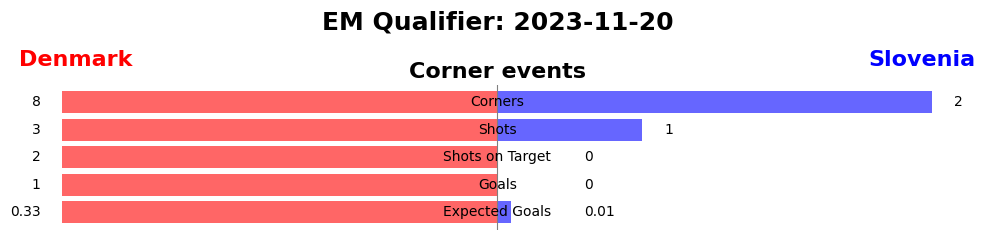

In [7]:
# Create barchart for corner overview
svn_data = {'Corners': corners_svn,
            'Shots': shots_svn,
            'Shots on Target': shots_on_goal_svn,
            'Goals': goals_scored_svn,
            'Expected Goals': xgoal_svn,
            }

opp_data = {'Corners': corners_opp,
            'Shots': shots_opp,
            'Shots on Target': shots_on_goal_opp,
            'Goals': goals_scored_opp,
            'Expected Goals': xgoal_opp,
            }

# if category % do not normalize
perc_categories = []

plot_stats_barchart(svn_data, opp_data, team1_name='Slovenia', team2_name='Denmark', perc_categories=perc_categories, title='EM Qualifier: 2023-11-20', 
                    subtitle='Corner events', team1_color='blue', team2_color='red')


Shot map after corners

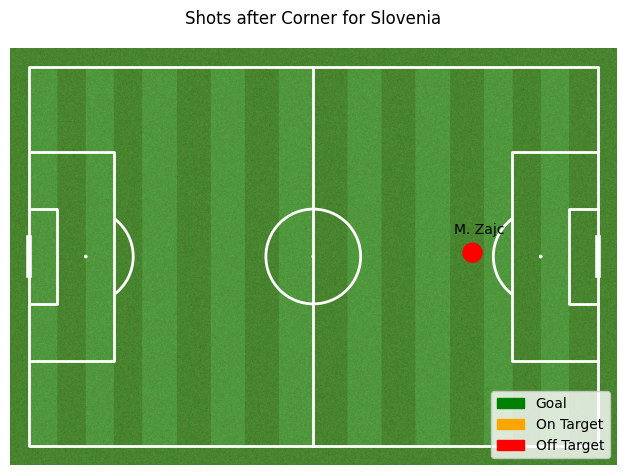

In [8]:
# Plot shot position and success on football field for Slowenia
df_shots_svn = df_corners_svn[df_corners_svn['possession.attack.withShot'] == True]

# Create Pitch with certain attributes
pitch = Pitch(pitch_length=pitch_length, pitch_width=pitch_width, pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

# Draw every shot and colour it regarding its success
for i, shot in df_shots_svn.iterrows():
    
    # Position of shot
    [x, y] = shot[['possession.endLocation.x', 'possession.endLocation.y']].to_list()

    teamname = shot['team.name']

    # Color of shot depends on if it was off/on target or goal
    if shot['possession.attack.withGoal'] is True:
        color = "green"

    elif shot['possession.attack.withShotOnGoal'] is True:
        color = "orange"

    else:
        color = "red"

    shotCircle = plt.Circle((x/100.0 * pitch_length, y/100.0 * pitch_width), 2, color=color)

    plt.text(x/100.0 * pitch_length-4, y/100.0 * pitch_width - 4, shot['player.name'])

    ax.add_patch(shotCircle)

# Define the legend labels and corresponding colors
legend_labels = ['Goal', 'On Target', 'Off Target']
legend_colors = ['green', 'orange', 'red']

# Create proxy artists for legend
legend_patches = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Add legend to the plot
plt.legend(handles=legend_patches, loc='lower right')

# Create title and save plot
fig.suptitle(f"Shots after Corner for {teamname}", fontsize = 12)
plt.savefig(f"plots/{teamname}_shots_corners_map.png", dpi=400)
plt.show()

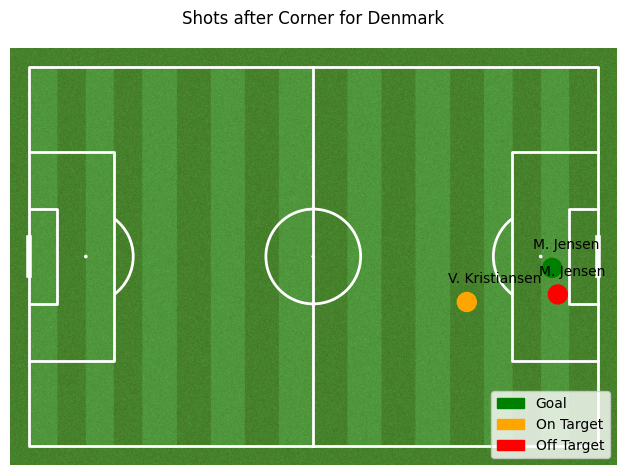

In [9]:
# Plot shot position and success on football field for Denmark
df_shots_opp = df_corners_opp[df_corners_opp['possession.attack.withShot'] == True]

# Create Pitch with certain attributes
pitch = Pitch(pitch_length=pitch_length, pitch_width=pitch_width, pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

# Draw every shot and colour it regarding its success
for i, shot in df_shots_opp.iterrows():
    
    # Position of shot
    [x, y] = shot[['possession.endLocation.x', 'possession.endLocation.y']].to_list()

    teamname = shot['team.name']

    # Color of shot depends on if it was off/on target or goal
    if shot['possession.attack.withGoal'] is True:
        color = "green"

    elif shot['possession.attack.withShotOnGoal'] is True:
        color = "orange"

    else:
        color = "red"

    shotCircle = plt.Circle((x/100.0 * pitch_length, y/100.0 * pitch_width), 2, color=color)

    plt.text(x/100.0 * pitch_length-4, y/100.0 * pitch_width - 4, shot['player.name'])

    ax.add_patch(shotCircle)
    
# Define the legend labels and corresponding colors
legend_labels = ['Goal', 'On Target', 'Off Target']
legend_colors = ['green', 'orange', 'red']

# Create proxy artists for legend
legend_patches = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Add legend to the plot
plt.legend(handles=legend_patches, loc='lower right')

# Create title and save plot
fig.suptitle(f"Shots after Corner for {teamname}", fontsize = 12)
plt.savefig(f"plots/{teamname}_shots_corners_map.png", dpi=400)
plt.show()

Corners recipient location

In [10]:
# Create Dataframe for the distribution of corner passes for Slowenia
df_distribution = pd.DataFrame()

# Determine pass types based on recipient location
pass_short = ((df_corners_svn["pass.endLocation.y"] < 19.0) & (df_corners_svn["location.y"] == 0.0)) | \
             ((df_corners_svn["pass.endLocation.y"] > 81.0) & (df_corners_svn["location.y"] == 100.0))
pass_parea = (df_corners_svn["pass.endLocation.y"] >= 19.0) & (df_corners_svn["pass.endLocation.y"] <= 81.0)
pass_long  = ((df_corners_svn["pass.endLocation.y"] < 19.0) & (df_corners_svn["location.y"] == 100.0)) | \
             ((df_corners_svn["pass.endLocation.y"] > 81.0) & (df_corners_svn["location.y"] == 0.0))
pass_wide  = (df_corners_svn["pass.endLocation.x"] >= 16.0) & (df_corners_svn["pass.endLocation.x"] <= 84.0)

# For every Corner type safe statistics for plotting
for i, pass_dst in enumerate([pass_short, pass_parea, pass_long, pass_wide]):

    if df_corners_svn.loc[pass_dst].empty:
        df_distribution.at[i, "x"] = -1.0
        df_distribution.at[i, "y"] = -1.0
        df_distribution.at[i, "amount"] = -1.0
        continue
    
    df_distribution.at[i, "x"] = np.mean(df_corners_svn.loc[pass_dst]['pass.endLocation.x'].to_numpy()).round(1)
    df_distribution.at[i, "y"] = np.mean(df_corners_svn.loc[pass_dst]['pass.endLocation.y'].to_numpy()).round(1)
    df_distribution.at[i, "amount"] = df_corners_svn.loc[pass_dst]['pass.endLocation.x'].count()

# Adjust circle sizes and transparency proportional to the number of passes received in a specific area
df_distribution['marker_size'] = (df_distribution['amount'] / df_distribution['amount'].max() * 1500)
df_distribution['marker_size'] = abs((df_distribution['marker_size'] > 0) * df_distribution['marker_size']).round(0)
df_distribution['alpha'] = abs(df_distribution['marker_size'] / df_distribution['marker_size'].max()).round(2)
df_distribution['percentage'] = abs(df_distribution['amount'] / df_distribution[df_distribution['amount'] > 0]['amount'].sum() * (df_distribution['amount'] > 0)) * 100

display(df_distribution)

,x,y,amount,marker_size,alpha,percentage
0,-1.0,-1.0,-1.0,0.0,0.0,0.0
1,93.5,56.5,2.0,1500.0,1.0,100.0
2,-1.0,-1.0,-1.0,0.0,0.0,0.0
3,-1.0,-1.0,-1.0,0.0,0.0,0.0


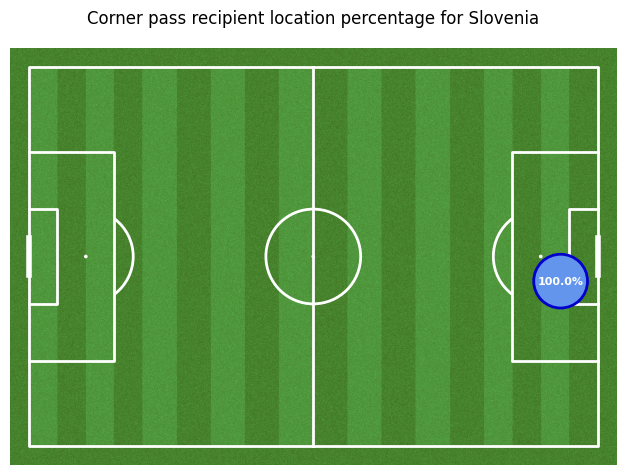

In [11]:
# Create pitch with certain attributes
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

# Draw circles proportional to the number of passes received in specific areas
pitch.scatter(df_distribution.x / 100. * pitch_length, df_distribution.y / 100. * pitch_width, s=df_distribution.marker_size, \
              color='cornflowerblue', edgecolors='mediumblue', linewidth=2, alpha=df_distribution.alpha.apply(lambda x: max(x, 0.75)), ax=ax, zorder = 3)

# Annotate circles with percentage of total passes
for i in range(4):

        x = df_distribution.at[i, "x"]
        if x == -1.0:
                continue

        x = x/100. * pitch_length
        y = df_distribution.at[i, "y"]/100. * pitch_width

        pitch.annotate(f"{df_distribution.at[i, 'percentage']}%", xy=(x, y), c='white', va='center',
                   ha='center', size=8, weight = "bold", ax=ax, zorder = 4)

# Create title and save plot
team_name = df_corners_svn["team.name"].iloc[0]
fig.suptitle(f"Corner pass recipient location percentage for {team_name}", fontsize = 12)
plt.savefig('plots/corner_recipient_loc_SVN.png', dpi=400)
plt.show()

In [12]:
# Create Dataframe for the distribution of corner passes for Denmark
df_distribution = pd.DataFrame()

# Determine pass types based on recipient location
pass_short = ((df_corners_opp["pass.endLocation.y"] < 19.0) & (df_corners_opp["location.y"] == 0.0)) | \
             ((df_corners_opp["pass.endLocation.y"] > 81.0) & (df_corners_opp["location.y"] == 100.0))
pass_parea = (df_corners_opp["pass.endLocation.y"] >= 19.0) & (df_corners_opp["pass.endLocation.y"] <= 81.0)
pass_long  = ((df_corners_opp["pass.endLocation.y"] < 19.0) & (df_corners_opp["location.y"] == 100.0)) | \
             ((df_corners_opp["pass.endLocation.y"] > 81.0) & (df_corners_opp["location.y"] == 0.0))
pass_wide  = (df_corners_opp["pass.endLocation.x"] >= 16.0) & (df_corners_opp["pass.endLocation.x"] <= 84.0)

# For every Corner type safe statistics for plotting
for i, pass_dst in enumerate([pass_short, pass_parea, pass_long, pass_wide]):

    if df_corners_opp.loc[pass_dst].empty:
        df_distribution.at[i, "x"] = -1.0
        df_distribution.at[i, "y"] = -1.0
        df_distribution.at[i, "amount"] = -1.0
        continue
    
    df_distribution.at[i, "x"] = np.mean(df_corners_opp.loc[pass_dst]['pass.endLocation.x'].to_numpy()).round(1)
    df_distribution.at[i, "y"] = np.mean(df_corners_opp.loc[pass_dst]['pass.endLocation.y'].to_numpy()).round(1)
    df_distribution.at[i, "amount"] = df_corners_opp.loc[pass_dst]['pass.endLocation.x'].count()

# Adjust circle sizes and transparency proportional to the number of passes received in a specific area
df_distribution['marker_size'] = (df_distribution['amount'] / df_distribution['amount'].max() * 1500)
df_distribution['marker_size'] = abs((df_distribution['marker_size'] > 0) * df_distribution['marker_size']).round(0)
df_distribution['alpha'] = abs(df_distribution['marker_size'] / df_distribution['marker_size'].max()).round(2)
df_distribution['percentage'] = abs(df_distribution['amount'] / df_distribution[df_distribution['amount'] > 0]['amount'].sum() * (df_distribution['amount'] > 0)) * 100

display(df_distribution)

,x,y,amount,marker_size,alpha,percentage
0,91.0,16.0,1.0,214.0,0.14,12.5
1,93.6,51.4,7.0,1500.0,1.00,87.5
2,-1.0,-1.0,-1.0,0.0,0.00,0.0
3,-1.0,-1.0,-1.0,0.0,0.00,0.0


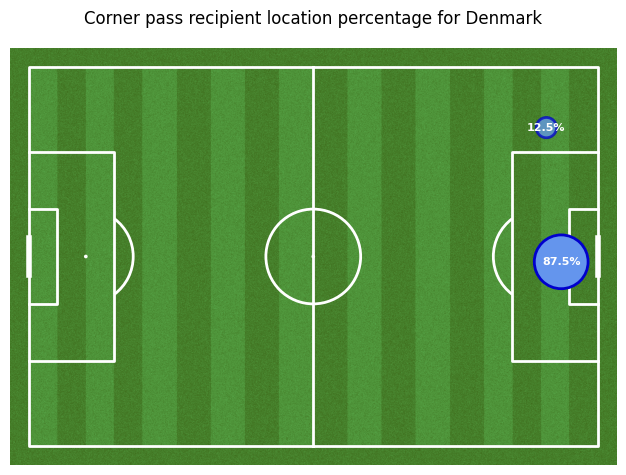

In [13]:
# Create pitch with certain attributes
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

# Draw circles proportional to the number of passes received in specific areas
pitch.scatter(df_distribution.x / 100. * pitch_length, df_distribution.y / 100. * pitch_width, s=df_distribution.marker_size, \
              color='cornflowerblue', edgecolors='mediumblue', linewidth=2, alpha=df_distribution.alpha.apply(lambda x: max(x, 0.75)), ax=ax, zorder = 3)

# Annotate circles with percentage of total passes
for i in range(4):
        
        # Take the average location of players to plot a line between them
        x = df_distribution.at[i, "x"]

        if x == -1.0:
                continue

        x = x/100. * pitch_length
        y = df_distribution.at[i, "y"]/100. * pitch_width

        pitch.annotate(f"{df_distribution.at[i, 'percentage']}%", xy=(x, y), c='white', va='center',
                   ha='center', size=8, weight = "bold", ax=ax, zorder = 4)

# Create title and save plot
team_name = df_corners_opp["team.name"].iloc[0]
fig.suptitle(f"Corner pass recipient location percentage for {team_name}", fontsize = 12)
plt.savefig('plots/corner_recipient_loc_DEN.png', dpi=400)
plt.show()

Corners leading to counterattacks

In [14]:
# Counterattack events
df_counterattacks = df_events[df_events['possession.types'].apply(lambda x: 'counterattack' in x if pd.notna(x) else False)]

# Counterattack for Slovenia
df_counterattacks_svn = df_counterattacks[df_counterattacks["team.name"] == "Slovenia"]

# Counterattack for Denmark
df_counterattacks_opp = df_counterattacks[df_counterattacks["opponentTeam.name"] == "Slovenia"]


In [15]:
# Get all corner timestamps for Slowenia
corner_ts_list_svn = df_corners_svn['matchTimestamp'].to_list()
print("Corner time stamp for Slowenia: ")
display(corner_ts_list_svn)

# Get all corner timestamps for Denmark
corner_ts_list_opp = df_corners_opp['matchTimestamp'].to_list()
print("Corner time stamp for Denmark: ")
display(corner_ts_list_opp)

Corner time stamp for Slowenia: 


['00:49:24.578', '01:33:06.784']

Corner time stamp for Denmark: 


['00:08:13.376',
 '00:42:29.700',
 '00:45:11.586',
 '00:50:39.967',
 '00:52:48.575',
 '00:53:20.568',
 '01:03:12.809',
 '01:18:44.493']

In [16]:
# Get all counter attack timestamps
counterattack_ts_list_opp = df_counterattacks_opp['matchTimestamp'].to_list()
print("Counter attack time stamp for Slowenia: ")
display(counterattack_ts_list_opp)

# Get all counter attack timestamps
counterattack_ts_list_svn = df_counterattacks_svn['matchTimestamp'].to_list()
print("Counter attack time stamp for Denmark: ")
display(counterattack_ts_list_svn)

Counter attack time stamp for Slowenia: 


[]

Counter attack time stamp for Denmark: 


[]

In [17]:
# Counter of amount of counter attacks after Denmark corner for Slowenia
counterattacks_recveived_opp = 0

# If a counterattack occurs 2 minutes after a corner, it's attributed to the corner
for corner_ts in corner_ts_list_opp:
    corner_ts = datetime.strptime(corner_ts, '%H:%M:%S.%f')
    for counterattack_ts in counterattack_ts_list_svn:
        counterattack_ts = datetime.strptime(counterattack_ts, '%H:%M:%S.%f')

        if counterattack_ts < corner_ts:
            continue
        
        if counterattack_ts - corner_ts >= timedelta(minutes=2):
            break
        
        counterattacks_recveived_opp += 1

print(counterattacks_recveived_opp)

0


In [18]:
# Counter of amount of counter attacks after Slowenia corner for Denmark
counterattacks_recveived_svn = 0

# If a counterattack occurs 2 minutes after a corner, it's attributed to the corner
for corner_ts in corner_ts_list_svn:
    corner_ts = datetime.strptime(corner_ts, '%H:%M:%S.%f')
    for counterattack_ts in counterattack_ts_list_opp:
        counterattack_ts = datetime.strptime(counterattack_ts, '%H:%M:%S.%f')

        if counterattack_ts < corner_ts:
            continue
        
        if counterattack_ts - corner_ts >= timedelta(minutes=2):
            break
        
        counterattacks_recveived_svn += 1

print(counterattacks_recveived_svn)

0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


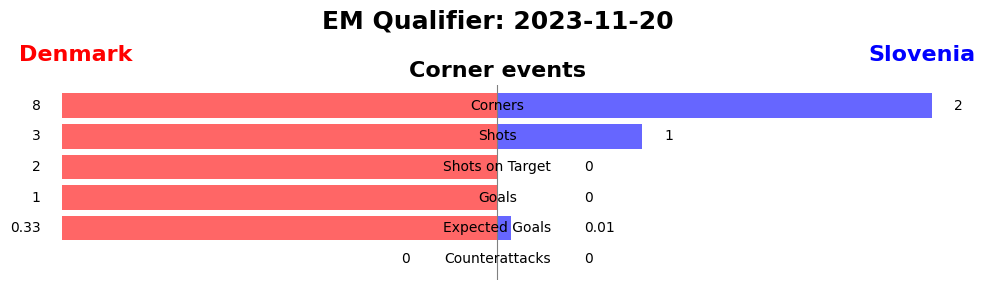

In [19]:
# Amount of counter attacks after Slowenia corner for Denmark
svn_data['Counterattacks'] = counterattacks_recveived_svn

# Amount of counter attacks after Denmark corner for Slowenia
opp_data['Counterattacks'] = counterattacks_recveived_opp

plot_stats_barchart(svn_data, opp_data, team1_name='Slovenia', team2_name='Denmark', perc_categories=perc_categories, title='EM Qualifier: 2023-11-20', 
                    subtitle='Corner events', team1_color='blue', team2_color='red')

## 5.2 Penalties

In this game there were no penalties.

In [20]:
# Penalty events of the game
df_penalties = df_events[df_events['type.primary']=='penalty']

display(df_penalties)

,Unnamed: 0,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,...,shot.isGoal,shot.onTarget,shot.goalZone,shot.xg,shot.postShotXg,shot.goalkeeperActionId,shot.goalkeeper,shot.goalkeeper.id,shot.goalkeeper.name,location


### 5.3 Free Kicks

In [21]:
# Free kick events for Slowenia
df_freekicks = df_events[(df_events['type.primary'] == 'free_kick') & (df_events['team.name'] == 'Slovenia')]

In [22]:
# Classify free kicks as shot, cross, goalkick or else
df_freekick_shots = df_freekicks[df_freekicks['type.secondary'].str.contains("shot")]
df_freekick_cross = df_freekicks[df_freekicks['type.secondary'].str.contains("cross")]
df_goalkick = df_freekicks[(df_freekicks['location.x'] <= 16.0) & ((df_freekicks['location.y'] <= 81.0) & (df_freekicks['location.y'] >= 19.0))]
df_freekick_else = df_freekicks[~df_freekicks['type.secondary'].str.contains("cross") & ~df_freekicks['type.secondary'].str.contains("shot") & ~((df_freekicks['location.x'] <= 16.0) & ((df_freekicks['location.y'] <= 81.0) & (df_freekicks['location.y'] >= 19.0)))]

display(df_freekick_shots)
display(df_freekick_cross)
display(df_freekick_else)

,Unnamed: 0,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,...,shot.isGoal,shot.onTarget,shot.goalZone,shot.xg,shot.postShotXg,shot.goalkeeperActionId,shot.goalkeeper,shot.goalkeeper.id,shot.goalkeeper.name,location
583,583,1854207824,5414302,1H,29,49,00:29:49.541,1790.541875,NaN,NaN,...,True,True,gtr,0.1248,0.3768,1.854207e+09,NaN,8480.0,K. Schmeichel,NaN


,Unnamed: 0,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,...,shot.isGoal,shot.onTarget,shot.goalZone,shot.xg,shot.postShotXg,shot.goalkeeperActionId,shot.goalkeeper,shot.goalkeeper.id,shot.goalkeeper.name,location


,Unnamed: 0,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,...,shot.isGoal,shot.onTarget,shot.goalZone,shot.xg,shot.postShotXg,shot.goalkeeperActionId,shot.goalkeeper,shot.goalkeeper.id,shot.goalkeeper.name,location
27,27,1854207163,5414302,1H,1,13,00:01:13.625,74.625857,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,51,1854207186,5414302,1H,2,30,00:02:30.655,151.655129,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576,576,1854207814,5414302,1H,28,1,00:28:01.798,1682.798106,1.854208e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724,724,1854207932,5414302,1H,37,46,00:37:46.114,2267.114819,1.854208e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821,821,1854207963,5414302,1H,44,12,00:44:12.174,2653.174251,1.854208e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,871,1854208003,5414302,1H,47,0,00:47:00.428,2821.428715,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041,1041,1854206232,5414302,2H,56,0,00:56:00.503,3499.503755,1.854206e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1298,1298,1854206527,5414302,2H,69,38,01:09:38.474,4317.474757,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,1553,1854206867,5414302,2H,85,31,01:25:31.799,5270.799947,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Calculate averages
avg_distance_shots = np.mean(np.sqrt(((100 - df_freekick_shots['location.x'])/100. * pitch_length)**2 + ((50 - df_freekick_shots['location.y'])/100. * pitch_width)**2))
avg_distance_cross = np.mean(np.sqrt(((100 - df_freekick_cross['location.x'])/100. * pitch_length)**2 + ((50 - df_freekick_cross['location.y'])/100. * pitch_width)**2))
avg_distance_else = np.mean(np.sqrt(((100 - df_freekick_else['location.x'])/100. * pitch_length)**2 + ((50 - df_freekick_else['location.y'])/100. * pitch_width)**2))

print("Average distance to goal for direct freekicks: %.0f m" % avg_distance_shots)
print("Average distance to goal for freekick crosses: %.0f m" % avg_distance_cross)
print("Average distance to goal for all other types of freekicks: %.0f m" % avg_distance_else)

Average distance to goal for direct freekicks: 26 m
Average distance to goal for freekick crosses: nan m
Average distance to goal for all other types of freekicks: 85 m


C:\Users\nicgr\AppData\Local\Temp\ipykernel_22796\989661493.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='average_distance', data=df_distance, palette=palette)


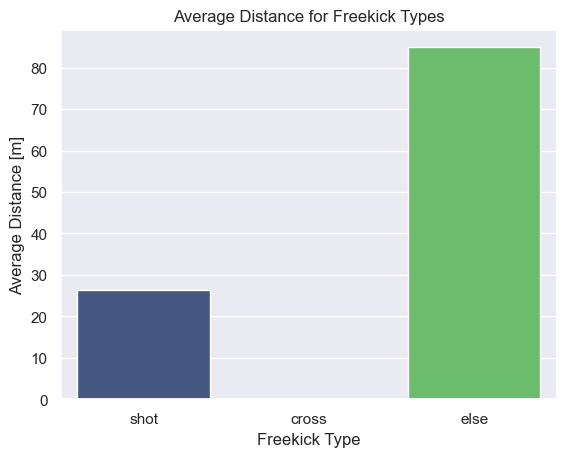

In [24]:
# Create Dataframe for the average distances of types of free kicks for Slowenia
df_distance = pd.DataFrame(columns=['type', 'average_distance'])

# Assign calculated averages
df_distance.at[0, 'type'] = 'shot'
df_distance.at[1, 'type'] = 'cross'
df_distance.at[2, 'type'] = 'else'

df_distance.at[0, 'average_distance'] = avg_distance_shots
df_distance.at[1, 'average_distance'] = avg_distance_cross
df_distance.at[2, 'average_distance'] = avg_distance_else

# Apply a Seaborn theme
sns.set_theme(style="darkgrid")

# Choose a color palette for the plot
palette = sns.color_palette("viridis", len(df_distance))

# Create the bar chart with the chosen palette
sns.barplot(x='type', y='average_distance', data=df_distance, palette=palette)

# Set the title of the plot
plt.title('Average Distance for Freekick Types')

# Customize further with Seaborn and Matplotlib
plt.xlabel('Freekick Type') # X-axis label
plt.ylabel('Average Distance [m]')    # Y-axis label

# Show and save the plot
plt.savefig('plots/avg_distance_freekick_slov.png', dpi=400)
plt.show()

In [25]:
# Create Dataframe that holds average distance of the different freekick types
df_fk_amount = pd.DataFrame(columns=['name', 'amount'])
for i, name in enumerate(df_freekicks["player.name"].unique()):

    if isinstance(name, float) and np.isnan(name):
        continue
    
    df_fk_amount.at[i, "name"] = name

    # Calculate number of passes
    df_fk_amount.at[i, "amount"] = df_freekicks.loc[df_freekicks["player.name"] == name].count().iloc[0]
    
display(df_fk_amount)

,name,amount
0,J. Bijol,4
1,J. Oblak,4
3,E. Janža,1
4,A. Čerin,1
5,M. Blažič,1
6,J. Kurtič,1


C:\Users\nicgr\AppData\Local\Temp\ipykernel_22796\1502133680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='amount', data=df_fk_amount, palette=palette)


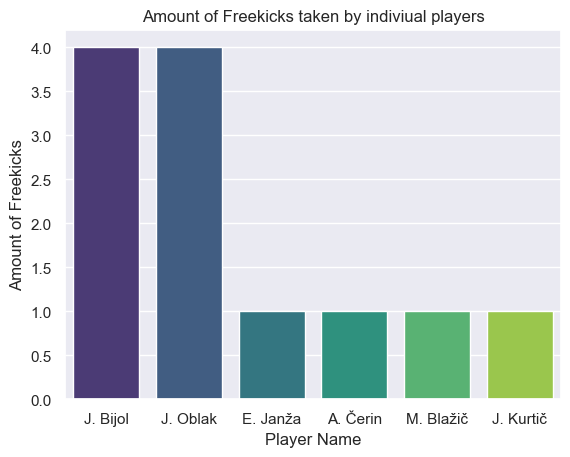

In [26]:
# Apply a Seaborn theme
sns.set_theme(style="darkgrid")

# Choose a color palette for the plot
palette = sns.color_palette("viridis", len(df_fk_amount))

# Create the bar chart with the chosen palette
sns.barplot(x='name', y='amount', data=df_fk_amount, palette=palette)

# Set the title of the plot
plt.title('Amount of Freekicks taken by indiviual players')

# Customize further with Seaborn and Matplotlib
plt.xlabel('Player Name') # X-axis label
plt.ylabel('Amount of Freekicks')    # Y-axis label

# Show and save the plot
plt.savefig('plots/freekick_takers_slov.png', dpi=400)
plt.show()

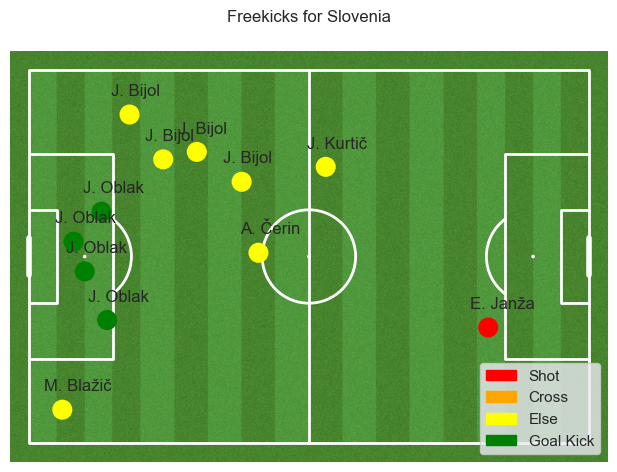

In [27]:
# Create pitch with certain attributes
pitch = Pitch(pitch_length=pitch_length, pitch_width=pitch_width, pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

# Define the legend and pitch circle colors
colors=['red', 'orange', 'yellow', 'green']

# Draw circles on basis of free kick types
for idx, dataset in enumerate([df_freekick_shots, df_freekick_cross, df_freekick_else, df_goalkick]):
    color = colors[idx]
    for i, freekick in dataset.iterrows():
        
        if isinstance(freekick['player.name'], float) and np.isnan(freekick['player.name']):
            continue

        # Position of free kick
        [x, y] = freekick[['location.x', 'location.y']].to_list()
        
        shotCircle = plt.Circle((x/100.0 * pitch_length, y/100.0 * pitch_width), 2, color=color)

        plt.text(x/100.0 * pitch_length-4, y/100.0 * pitch_width - 4, freekick['player.name'])

        ax.add_patch(shotCircle)

# Define the legend labels
legend_labels = ['Shot', 'Cross', 'Else', 'Goal Kick']

# Create proxy artists for legend
legend_patches = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]

# Add legend to the plot
plt.legend(handles=legend_patches, loc='lower right')

# Create title and save plot
fig.suptitle(f"Freekicks for Slovenia", fontsize = 12)
plt.savefig(f"plots/Slovenia_freekick_map.png", dpi=400)
plt.show()

In [28]:
# Free kick events for Denmark
df_freekicks = df_events[(df_events['type.primary'] == 'free_kick') & (df_events['team.name'] == 'Denmark')]

In [29]:
# Classify free kicks as shot, cross, goalkick or else
df_freekick_shots = df_freekicks[df_freekicks['type.secondary'].str.contains("shot")]
df_freekick_cross = df_freekicks[df_freekicks['type.secondary'].str.contains("cross")]
df_goalkick = df_freekicks[(df_freekicks['location.x'] <= 16.0) & ((df_freekicks['location.y'] <= 81.0) & (df_freekicks['location.y'] >= 19.0))]
df_freekick_else = df_freekicks[~df_freekicks['type.secondary'].str.contains("cross") & ~df_freekicks['type.secondary'].str.contains("shot") & ~((df_freekicks['location.x'] <= 16.0) & ((df_freekicks['location.y'] <= 81.0) & (df_freekicks['location.y'] >= 19.0)))]

display(df_freekick_shots)
display(df_freekick_cross)
display(df_freekick_else)

,Unnamed: 0,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,...,shot.isGoal,shot.onTarget,shot.goalZone,shot.xg,shot.postShotXg,shot.goalkeeperActionId,shot.goalkeeper,shot.goalkeeper.id,shot.goalkeeper.name,location


,Unnamed: 0,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,...,shot.isGoal,shot.onTarget,shot.goalZone,shot.xg,shot.postShotXg,shot.goalkeeperActionId,shot.goalkeeper,shot.goalkeeper.id,shot.goalkeeper.name,location
1059,1059,1854207314,5414302,2H,57,37,00:57:37.553,3596.553922,1.854206e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Unnamed: 0,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,...,shot.isGoal,shot.onTarget,shot.goalZone,shot.xg,shot.postShotXg,shot.goalkeeperActionId,shot.goalkeeper,shot.goalkeeper.id,shot.goalkeeper.name,location
96,96,1854206177,5414302,1H,5,13,00:05:13.608,314.608381,1.854206e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,111,1854206198,5414302,1H,6,9,00:06:09.067,370.067669,1.854206e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,305,1854206434,5414302,1H,16,21,00:16:21.308,982.308562,1.854206e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,482,1854206604,5414302,1H,23,11,00:23:11.803,1392.803270,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556,556,1854206698,5414302,1H,27,17,00:27:17.971,1638.971605,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616,616,1854206794,5414302,1H,32,36,00:32:36.093,1957.093856,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,683,1854206914,5414302,1H,35,33,00:35:33.067,2134.067834,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
732,732,1854206980,5414302,1H,38,18,00:38:18.167,2299.167736,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,910,1854207194,5414302,2H,46,44,00:46:44.470,2943.470481,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1029,1029,1854207295,5414302,2H,55,1,00:55:01.586,3440.586602,1.854207e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Calculate averages
avg_distance_shots = np.mean(np.sqrt(((100 - df_freekick_shots['location.x'])/100. * pitch_length)**2 + ((50 - df_freekick_shots['location.y'])/100. * pitch_width)**2))
avg_distance_cross = np.mean(np.sqrt(((100 - df_freekick_cross['location.x'])/100. * pitch_length)**2 + ((50 - df_freekick_cross['location.y'])/100. * pitch_width)**2))
avg_distance_else = np.mean(np.sqrt(((100 - df_freekick_else['location.x'])/100. * pitch_length)**2 + ((50 - df_freekick_else['location.y'])/100. * pitch_width)**2))

print("Average distance to goal for direct freekicks: %.0f m" % avg_distance_shots)
print("Average distance to goal for freekick crosses: %.0f m" % avg_distance_cross)
print("Average distance to goal for all other types of freekicks: %.0f m" % avg_distance_else)

Average distance to goal for direct freekicks: nan m
Average distance to goal for freekick crosses: 42 m
Average distance to goal for all other types of freekicks: 69 m


C:\Users\nicgr\AppData\Local\Temp\ipykernel_22796\1282905230.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='average_distance', data=df_distance, palette=palette)


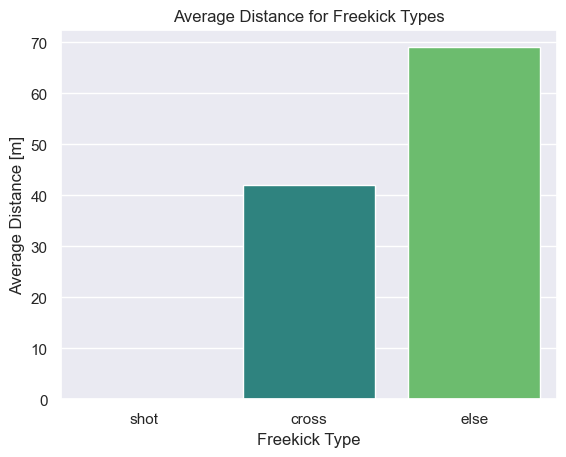

In [31]:
# Create Dataframe for the average distances of types of free kicks for Slowenia
df_distance = pd.DataFrame(columns=['type', 'average_distance'])

# Assign calculated averages
df_distance.at[0, 'type'] = 'shot'
df_distance.at[1, 'type'] = 'cross'
df_distance.at[2, 'type'] = 'else'

df_distance.at[0, 'average_distance'] = avg_distance_shots
df_distance.at[1, 'average_distance'] = avg_distance_cross
df_distance.at[2, 'average_distance'] = avg_distance_else

# Apply a Seaborn theme
sns.set_theme(style="darkgrid")

# Choose a color palette for the plot
palette = sns.color_palette("viridis", len(df_distance))

# Create the bar chart with the chosen palette
sns.barplot(x='type', y='average_distance', data=df_distance, palette=palette)

# Set the title of the plot
plt.title('Average Distance for Freekick Types')

# Customize further with Seaborn and Matplotlib
plt.xlabel('Freekick Type') # X-axis label
plt.ylabel('Average Distance [m]')    # Y-axis label

# Show and save the plot
plt.savefig('plots/avg_distance_freekick_den.png', dpi=400)
plt.show()

In [32]:
# Create Dataframe that holds average distance of the different freekick types
df_fk_amount = pd.DataFrame(columns=['name', 'amount'])
for i, name in enumerate(df_freekicks["player.name"].unique()):

    if isinstance(name, float) and np.isnan(name):
        continue
    
    df_fk_amount.at[i, "name"] = name

    # Calculate number of passes
    df_fk_amount.at[i, "amount"] = df_freekicks.loc[df_freekicks["player.name"] == name].count().iloc[0]
    
display(df_fk_amount)

,name,amount
0,A. Christensen,1
1,P. Højbjerg,4
2,J. Andersen,3
4,J. Maehle,1
5,M. Jensen,1
6,K. Schmeichel,1


C:\Users\nicgr\AppData\Local\Temp\ipykernel_22796\179396026.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='amount', data=df_fk_amount, palette=palette)


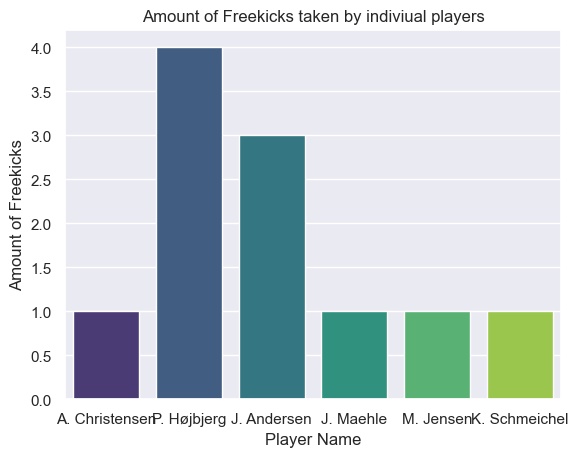

In [33]:
# Apply a Seaborn theme
sns.set_theme(style="darkgrid")

# Choose a color palette for the plot
palette = sns.color_palette("viridis", len(df_fk_amount))

# Create the bar chart with the chosen palette
sns.barplot(x='name', y='amount', data=df_fk_amount, palette=palette)

# Set the title of the plot
plt.title('Amount of Freekicks taken by indiviual players')

# Customize further with Seaborn and Matplotlib
plt.xlabel('Player Name') # X-axis label
plt.ylabel('Amount of Freekicks')    # Y-axis label

# Show and save the plot
plt.savefig('plots/freekick_takers_den.png', dpi=400)
plt.show()

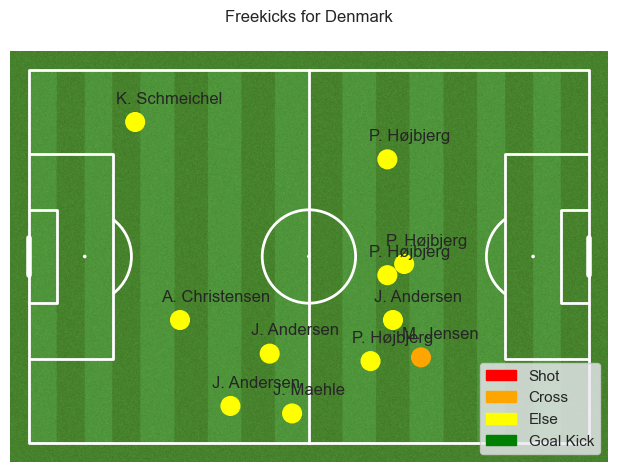

In [34]:
# Create pitch with certain attributes
pitch = Pitch(pitch_length=pitch_length, pitch_width=pitch_width, pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

# Define the legend and pitch circle colors
colors=['red', 'orange', 'yellow', 'green']

# Draw circles on basis of free kick types
for idx, dataset in enumerate([df_freekick_shots, df_freekick_cross, df_freekick_else, df_goalkick]):
    color = colors[idx]
    for i, freekick in dataset.iterrows():
        
        if isinstance(freekick['player.name'], float) and np.isnan(freekick['player.name']):
            continue

        # Position of free kick
        [x, y] = freekick[['location.x', 'location.y']].to_list()
        
        shotCircle = plt.Circle((x/100.0 * pitch_length, y/100.0 * pitch_width), 2, color=color)

        plt.text(x/100.0 * pitch_length-4, y/100.0 * pitch_width - 4, freekick['player.name'])

        ax.add_patch(shotCircle)

# Define the legend labels
legend_labels = ['Shot', 'Cross', 'Else', 'Goal Kick']

# Create proxy artists for legend
legend_patches = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]

# Add legend to the plot
plt.legend(handles=legend_patches, loc='lower right')

# Create title and save plot
fig.suptitle(f"Freekicks for Denmark", fontsize = 12)
plt.savefig(f"plots/Denmark_freekick_map.png", dpi=400)
plt.show()